## Laboratorio 2

#### Sebastián Gaona Castellanos- 202012158

### Entendimiento de Datos

In [1]:
# Cargar Datos CSV
import pandas as pd
import numpy as np
data_csv="data.csv"
df=pd.read_csv(data_csv,sep=',', encoding = 'utf-8')

/var/folders/4l/ns658b_x7jq0xzx004lrrl_w0000gn/T/ipykernel_11460/1216514204.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.sample(5)

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,...,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
370,2,2,69,2,1,dizziness,1,0,#BOÞ!,150.0,...,36.8,98.0,3,Cerebrovascular accident NOS,2,3,0,596,"3,00",0
55,2,2,40,3,1,"Leg pain, NOS",1,1,3,110.0,...,36.4,NaN,5,Complex regional pain syndrome type II,1,5,0,60,"2,00",0
125,1,1,60,3,1,facial palsy left,1,0,#BOÞ!,149.0,...,36.4,NaN,3,Bell's palsy,1,3,0,133,"6,13",0
589,1,1,80,2,1,dyspnea,1,0,#BOÞ!,NaN,...,36.8,NaN,2,Dyspnea,2,2,0,324,"2,33",0
290,1,2,52,2,1,distended abdomen,1,1,4,155.0,...,37.8,NaN,3,Alcoholic liver disease,2,3,0,1400,"16,32",0


In [3]:
#Se elimina columna Queja_Principal y Diagnostico_En_Urgencias para facilitar el analisis
df.drop(['Queja_Principal','Diagnostico_En_Urgencias'], axis=1, inplace=True)
print(df.shape)

(1000, 21)


La base de Datos cuenta con 1000 filas y 21 columnas donde cada fila representa un paciente que llegó a MediAlpes junto a su caracterización.

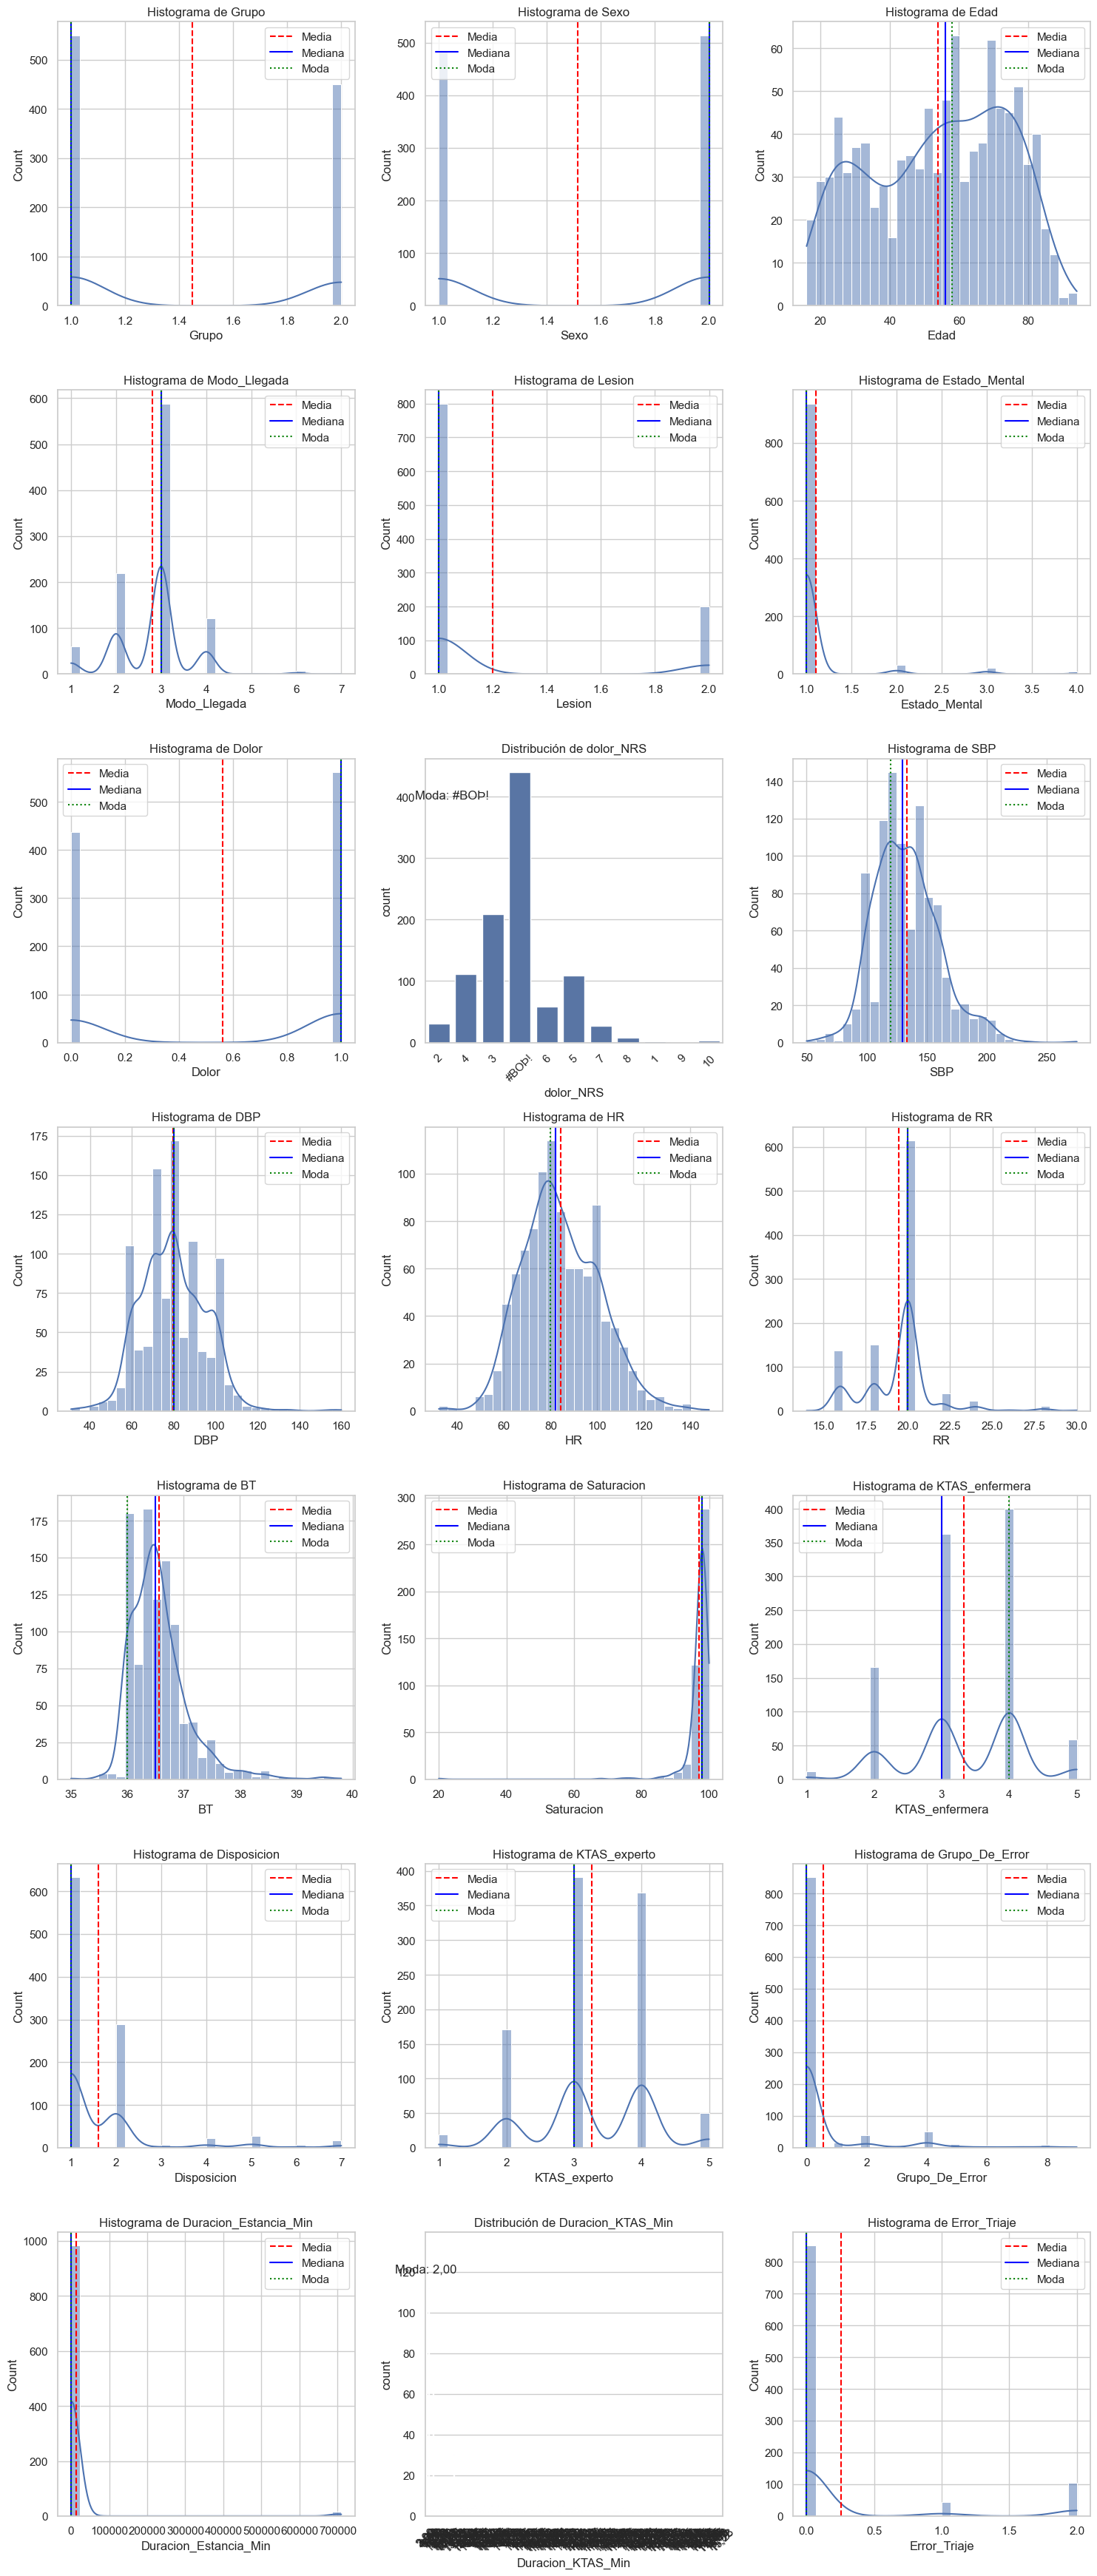

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

num_columns = 3  
num_rows = (len(df.columns) + num_columns - 1) // num_columns  

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterar sobre las columnas y graficar las distribuciones
for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        # Gráfico de histograma para columnas numéricas
        sns.histplot(df[column], bins=30, ax=axes[i], kde=True)  # kde=True agrega la curva de densidad
        axes[i].set_title(f'Histograma de {column}')

        # Calcular y agregar líneas para media, mediana y moda
        mean_value = df[column].mean()
        median_value = df[column].median()
        mode_value = df[column].mode()[0]  # Tomar la primera moda

        # Agregar líneas verticales
        axes[i].axvline(mean_value, color='red', linestyle='--', label='Media')
        axes[i].axvline(median_value, color='blue', linestyle='-', label='Mediana')
        axes[i].axvline(mode_value, color='green', linestyle=':', label='Moda')

        # Agregar leyenda
        axes[i].legend()

    else:
        # Gráfico de barras para columnas categóricas
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(f'Distribución de {column}')
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visualización

        # Calcular la moda para el gráfico de barras
        mode_value = df[column].mode()[0]
        axes[i].text(0.5, max(df[column].value_counts()) * 0.9, f'Moda: {mode_value}', ha='center')

# Ocultar ejes no utilizados
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajustar el layout
plt.tight_layout()
plt.show()


A partir de la gráfica que distribución de datos podemos evidenciar que las columna de Grupo y Sexo parecen estar balanceadas, a diferencia de otras columna como estado mental o Disposición las cuales parecen tener una clara tendencia. Hay columnas en donde se ve una clara distribcuión normal como lo son aquellas relacionadas con signos vitales. Finalmente, se puede apreciar que la columna duración KTAS Min está presentando algún problema de tipo de datos ya que su histograma no es el esperado.

#### Análisis de Calidad y Perfilamiento

Imprimir nombres de las columnas

In [5]:
column_names = df.columns.tolist()
print(column_names)

['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion', 'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 'Grupo_De_Error', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje']


Establecer variables categoricas (ordinales y nominales) y numéricas continuas a partir del diccionario de datos

In [6]:
numeric_vars=['Edad','SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion','Duracion_Estancia_Min', 'Duracion_KTAS_Min']
categorical_ordinal_vars=['Estado_Mental','dolor_NRS', 'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 'Grupo_De_Error', 'Error_Triaje' ]
categorical_nominal_vars=['Grupo','Sexo','Modo_Llegada','Lesion','Dolor']

Análisis Consistencia y Validez: Se verifica que los datos sean acordes con la información suministrada en el diccionario de datos del negocio

In [7]:
#Revisar los tipos de dato deben ser object si es String y date si es fecha
print(df.dtypes)

Grupo                      int64
Sexo                       int64
Edad                       int64
Modo_Llegada               int64
Lesion                     int64
Estado_Mental              int64
Dolor                      int64
dolor_NRS                 object
SBP                      float64
DBP                      float64
HR                       float64
RR                       float64
BT                       float64
Saturacion               float64
KTAS_enfermera             int64
Disposicion                int64
KTAS_experto               int64
Grupo_De_Error             int64
Duracion_Estancia_Min      int64
Duracion_KTAS_Min         object
Error_Triaje               int64
dtype: object


In [8]:
#Identificar valores unicos de todas las columnas 
for column in df.columns:
    print(column,df[column].unique())

Grupo [2 1]
Sexo [2 1]
Edad [49 30 61 67 77 74 58 27 31 42 69 50 70 35 47 78 71 82 44 72 29 73 36 22
 33 39 20 34 62 60 51 66 89 45 32 48 24 57 40 65 79 85 88 41 43 25 19 54
 75 81 59 26 83 53 28 87 56 76 68 37 84 52 80 55 21 23 18 16 94 86 64 38
 46 90 17 93 63 92]
Modo_Llegada [2 4 3 1 6 5 7]
Lesion [1 2]
Estado_Mental [1 4 2 3]
Dolor [1 0]
dolor_NRS ['2' '4' '3' '#BOÞ!' '6' '5' '7' '8' '1' '9' '10']
SBP [150. 140. 100. 120. 143. 110. 118. 130.  91. 145. 166. 122. 156. 101.
 132. 187. 162. 131. 138. 137. 171. 157.  95. 108. 160. 178. 163. 107.
 141.  70. 164. 196. 124.  96. 123.  60. 136. 139. 179. 119. 127.  nan
 233. 170.  99. 154. 152. 112. 144. 168. 106. 180. 134. 146. 159. 114.
 147. 115.  94. 149.  80. 177. 204. 148. 117. 113. 129. 116. 167. 190.
 102. 211. 104. 125. 191. 198. 142. 158. 203. 173. 169. 186. 161. 183.
 103. 153. 133. 199. 182. 135. 155. 111.  93. 121.  65. 214.  86.  90.
 220. 165. 201. 126. 176. 200. 194.  98. 206. 109. 193. 151. 181.  97.
 128. 105. 197.  75. 2

Hallazgos:
* La columna Dolor_NRS Y Duración_KTAS_Min deberían ser numéricas
* La columna Modo de LLegada tiene valores inválidos 6 y 7
* La columna dolor_NRS tiene valor inválido #BOÞ!

Se arregla:

In [9]:
# Cambiar el tipo de dato de las columnas Dolor_NRS a numérico
df['dolor_NRS'] = pd.to_numeric(df['dolor_NRS'], errors='coerce')
#Reemplazar comas por puntos en la columna Duración_KTAS_Min
df['Duracion_KTAS_Min'] = df['Duracion_KTAS_Min'].str.replace(',', '.')
#Cambiar el tipo de dato de la columna Duración_KTAS_Min a numérico
df['Duracion_KTAS_Min'] = pd.to_numeric(df['Duracion_KTAS_Min'], errors='coerce')

# Calcular la moda de la columna
moda = df['Modo_Llegada'].mode()[0]
# Reemplazar los valores 6 y 7 con la moda
df['Modo_Llegada'] = np.where(df['Modo_Llegada'].isin([6, 7]), moda, df['Modo_Llegada'])

#Se identifico que el valor inválido #BOP! es equivalente a 0
df['dolor_NRS'] = df['dolor_NRS'].fillna(0)

#Revisar los tipos de dato deben ser object si es String y date si es fecha
print(df.dtypes)
#Identificar valores unicos de todas las columnas 
for column in df.columns:
    print(column,df[column].unique())

Grupo                      int64
Sexo                       int64
Edad                       int64
Modo_Llegada               int64
Lesion                     int64
Estado_Mental              int64
Dolor                      int64
dolor_NRS                float64
SBP                      float64
DBP                      float64
HR                       float64
RR                       float64
BT                       float64
Saturacion               float64
KTAS_enfermera             int64
Disposicion                int64
KTAS_experto               int64
Grupo_De_Error             int64
Duracion_Estancia_Min      int64
Duracion_KTAS_Min        float64
Error_Triaje               int64
dtype: object
Grupo [2 1]
Sexo [2 1]
Edad [49 30 61 67 77 74 58 27 31 42 69 50 70 35 47 78 71 82 44 72 29 73 36 22
 33 39 20 34 62 60 51 66 89 45 32 48 24 57 40 65 79 85 88 41 43 25 19 54
 75 81 59 26 83 53 28 87 56 76 68 37 84 52 80 55 21 23 18 16 94 86 64 38
 46 90 17 93 63 92]
Modo_Llegada [2 4 3 1 5]
L

Análisis Unicidad: Se identifican y se arreglan registros duplicados

In [10]:
#Contar filas duplicadas
print("Filas duplicadas antes")
print(df.duplicated().sum())
#Eliminar filas duplicadas
df.drop_duplicates(inplace=True)
#Contar filas duplicadas
print("Filas duplicadas ahora")
print(df.duplicated().sum())


Filas duplicadas antes
34
Filas duplicadas ahora
0


Ánalisis Completitud: Se identifican y solucionan los valores nulos

In [11]:
#Contar valores nulos por columna
print(df.isnull().sum())

Grupo                      0
Sexo                       0
Edad                       0
Modo_Llegada               0
Lesion                     0
Estado_Mental              0
Dolor                      0
dolor_NRS                  0
SBP                       16
DBP                       20
HR                        11
RR                        14
BT                        10
Saturacion               533
KTAS_enfermera             0
Disposicion                0
KTAS_experto               0
Grupo_De_Error             0
Duracion_Estancia_Min      0
Duracion_KTAS_Min          0
Error_Triaje               0
dtype: int64


Por la aproximada distribución normal de las columnas con valores faltantes se reemplazan por la media.

In [12]:
#Rellenar valores nulos con el promedio de la columna
df['SBP'] = df['SBP'].fillna(df['SBP'].mean())
#Rellenar valores nulos con el promedio de la columna
df['DBP'] = df['DBP'].fillna(df['DBP'].mean())
#Rellenar valores nulos con el promedio de la columna
df['HR'] = df['HR'].fillna(df['HR'].mean())
#Rellenar valores nulos con el promedio de la columna
df['RR'] = df['RR'].fillna(df['RR'].mean())
#Rellenar valores nulos con el promedio de la columna
df['BT'] = df['BT'].fillna(df['BT'].mean())
#Rellenar valores nulos con el promedio de la columna
df['Saturacion'] = df['Saturacion'].fillna(df['Saturacion'].mean())

#Contar valores nulos por columna
print(df.isnull().sum())

Grupo                    0
Sexo                     0
Edad                     0
Modo_Llegada             0
Lesion                   0
Estado_Mental            0
Dolor                    0
dolor_NRS                0
SBP                      0
DBP                      0
HR                       0
RR                       0
BT                       0
Saturacion               0
KTAS_enfermera           0
Disposicion              0
KTAS_experto             0
Grupo_De_Error           0
Duracion_Estancia_Min    0
Duracion_KTAS_Min        0
Error_Triaje             0
dtype: int64


#### Algoritmos Seleccionados 

* K-Means 

    K-Means es adecuado cuando se busca dividir a los pacientes en grupos basados en características similares, lo que puede ayudar a identificar patrones comunes en los tipos de emergencias y optimizar los protocolos de atención. Es simple y eficiente en términos de tiempo, lo cual es importante cuando se trabaja con grandes volúmenes de datos, como los registros de pacientes en urgencias.

    K-Means es un algoritmo que organiza los datos en un número fijo de clusters definidos por el usuario. Asigna cada punto de datos al cluster cuyo centroide es más cercano. Luego, recalcula los centroides de los clusters hasta que la asignación de los puntos no cambie.

    Hiperparámetros a definir:

    * Número de clusters (k): Determina cuántos grupos queremos formar. Se puede optimizar utilizando el método del codo o la silueta.

    * Iteraciones máximas: El número máximo de veces que el algoritmo recalculará los centroides.

    * Inicialización de centroides: El método por el cual se eligen los centroides iniciales, como "k-means++" para mejorar la convergencia.

* DBSCAN 

    DBSCAN es útil cuando los datos tienen ruido o cuando los grupos no son de forma esférica, como podría ser el caso de los pacientes con condiciones atípicas. Ayuda a detectar tanto grupos principales como casos que no pertenecen a ningún grupo, lo cual es valioso para identificar patrones inusuales en las emergencias.

    DBSCAN agrupa puntos que están densamente conectados, es decir, cuando un número suficiente de puntos están cercanos entre sí. A diferencia de K-Means, no requiere que se especifique el número de clusters de antemano y puede identificar puntos ruidosos que no pertenecen a ningún cluster.

    Hiperparámetros a definir:

    * Epsilon (ε): La distancia máxima entre dos puntos para que se consideren en el mismo cluster.

    * MinPts: El número mínimo de puntos necesarios para formar un cluster.

    * Métrica de distancia: La forma en que se mide la distancia entre puntos, como la distancia euclidiana.
    
* Agglomerative Hierarchical Clustering

    Es útil para el análisis exploratorio cuando no se tiene un número claro de grupos y se quiere observar cómo los datos se agrupan de manera jerárquica. Esto podría ayudar a MediAlpes a entender mejor cómo las características de los pacientes se agrupan en diferentes niveles de similitud.

    Este algoritmo agrupa puntos de datos de manera jerárquica, fusionando los puntos más cercanos en cada iteración hasta formar un único cluster o detenerse cuando se alcanza un número deseado de grupos. El resultado es un dendrograma que permite visualizar la estructura de los clusters.

    Hiperparámetros a definir:

    * Método de enlace (linkage): Define cómo se mide la distancia entre clusters (single, complete, average).

    * Distancia de corte: Determina a qué altura del dendrograma cortar para obtener un número óptimo de clusters.
    
    * Métrica de distancia: Igual que en DBSCAN, puede ser la distancia euclidiana o alguna otra.

#### Preprocesamiento

Se planteó el siguiente preprocesamiento con base a los algoritmos seleccionados:

* Windsorización de Outliers: Limita los valores extremos para evitar que distorsionen los resultados de los algoritmos de agrupación, especialmente K-Means y Hierarchical Clustering, que son sensibles a estos valores.

* OneHotEncoder para Columnas Categóricas Nominales: Convierte las variables categóricas en numéricas, lo que permite que los algoritmos basados en distancias puedan procesar adecuadamente las diferencias entre categorías.

* Estandarización: Asegura que todas las características numéricas tengan la misma escala, evitando que una variable con mayor magnitud domine en los cálculos de distancia, mejorando el rendimiento de los tres algoritmos.

Windsorización de Outliers:

In [13]:
# Iterar sobre cada columna numérica continua
for columna in numeric_vars:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplazar los outliers con los límites (Winsorización)
    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)

OneHotEncoder para Columnas Categóricas Nominales:

In [14]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Inicializar el OneHotEncoder con la opción drop='first'
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar el OneHotEncoder solo a las columnas especificadas
encoded_vars = encoder.fit_transform(df[categorical_nominal_vars])

# Obtener los nombres de las nuevas columnas codificadas
encoded_columns = encoder.get_feature_names_out(categorical_nominal_vars)

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_vars, columns=encoded_columns)

# Alinear los índices del DataFrame original y del codificado
encoded_df.index = df.index

# Concatenar el DataFrame original (sin las columnas originales) con las columnas codificadas
df_encoded = pd.concat([df.drop(columns=categorical_nominal_vars), encoded_df], axis=1)

df=df_encoded.copy()

# Mostrar el DataFrame resultante
df.head()



,Edad,Estado_Mental,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,...,Duracion_KTAS_Min,Error_Triaje,Grupo_2,Sexo_2,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Lesion_2,Dolor_1
0,49,1,2.0,150.0,90.0,92.0,20.0,36.2,98.000000,2,...,2.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,30,1,4.0,140.0,80.0,76.0,20.0,36.3,99.000000,3,...,3.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,61,1,3.0,100.0,60.0,84.0,20.0,36.4,98.000000,4,...,2.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,61,1,4.0,120.0,70.0,76.0,20.0,36.5,99.000000,4,...,2.0,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,67,1,0.0,143.0,70.0,130.0,20.0,37.7,97.039261,4,...,3.6,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Estandarización:

In [15]:
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización solo a las columnas especificadas
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Mostrar el DataFrame con las columnas estandarizadas
df.head()

,Edad,Estado_Mental,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,...,Duracion_KTAS_Min,Error_Triaje,Grupo_2,Sexo_2,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Lesion_2,Dolor_1
0,-0.244905,1,2.0,0.631918,0.713425,0.474472,0.371772,-0.773880,0.805882,2,...,-1.073009,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.205169,1,4.0,0.252569,0.026729,-0.525865,0.371772,-0.548809,2.008023,3,...,-0.761380,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.361577,1,3.0,-1.264828,-1.346664,-0.025697,0.371772,-0.323739,0.805882,4,...,-1.073009,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.361577,1,4.0,-0.506129,-0.659968,-0.525865,0.371772,-0.098669,2.008023,4,...,-1.073009,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.664818,1,0.0,0.366373,-0.659968,2.850272,0.371772,2.602176,-0.349062,4,...,-0.574403,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Implementación Algoritmos

K means

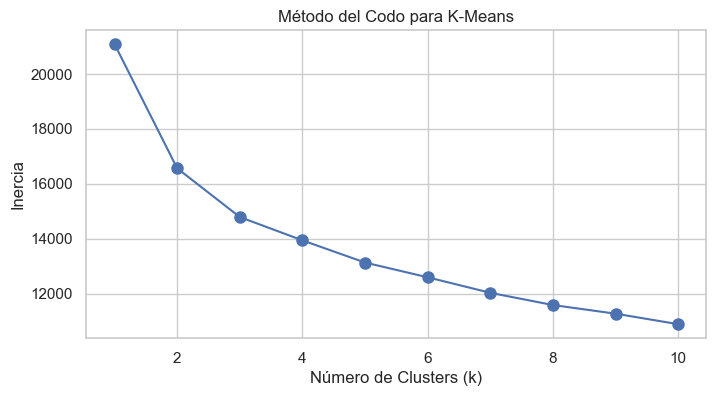

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.values

# Método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.show()



Se identifica que el número óptimo de clusters es 3 ya que es el punto de quiebre donde la inercia comienza a disminuir más contantemente y se aplica K-means

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster_KMeans'] = kmeans.labels_
labels_kmeans = kmeans.labels_

DBSCAN

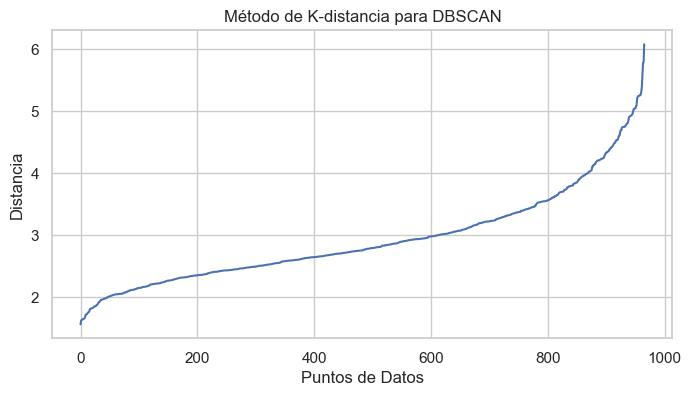

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Usar k-distancias para determinar epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('Método de K-distancia para DBSCAN')
plt.ylabel('Distancia')
plt.xlabel('Puntos de Datos')
plt.show()



Para identificar el hiperparámetro epsilon se utiliza k vecinos para determinar el máxima distancia para que dos puntos sean considerados del mismo clúster. En el gráfico podemos evidenciar que aproximadamente en el valor de 3 la distancia empieza a crecer exponencialmente determinando ese valor cómo parámetro ya que es el punto de quiebre.

Se establece el uso de la distancia euclediana por defecto ya que se está trabajando con datos continuos que representan  características medidas en una misma escala

In [19]:
# dbscan
dbscan = DBSCAN(eps=3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)  
df['Cluster_DBSCAN'] = labels_dbscan

Agglomerative Hierarchical Clustering

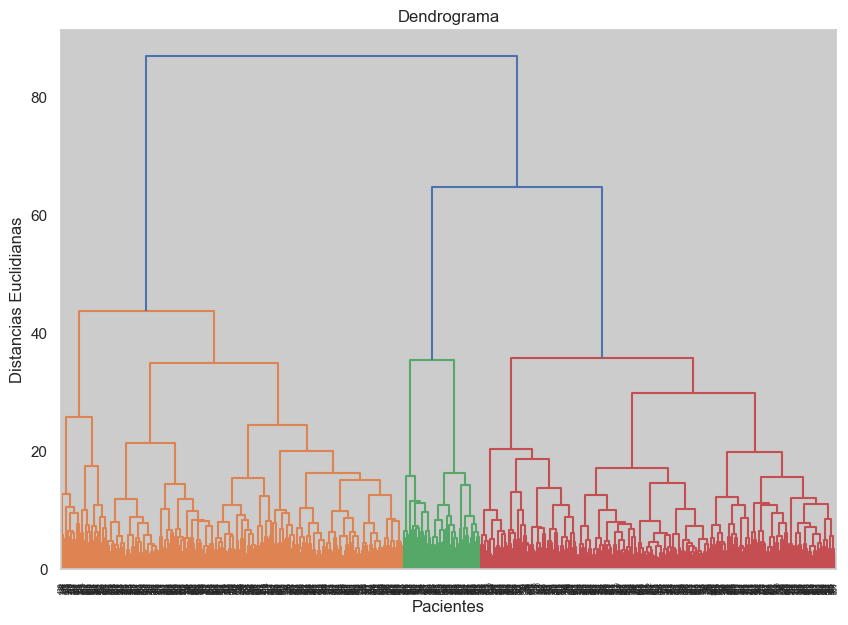

In [20]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrograma para determinar el número óptimo de clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pacientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

A partir del dendograma podemos establecer un número óptimo de clusters en 3 ya que se pueden identificar tres grupos significativos 1 por cada color. En este caso usar el hiperparametro Ward con distancia euclidiana es adecuado se busca formar grupos compactos y bien definidos entre los pacientes que llegan a urgencias, lo que facilitará optimizar los recursos y protocolos al identificar patrones claros y separados en sus características médicas

In [21]:
# Ajustar el modelo Hierarchical Clustering con el número óptimo de clusters 
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels_agg = agg_cluster.fit_predict(X)
df['Cluster_Hierarchical'] = labels_agg

#### Validación Cuantitativa

El coeficiente de silueta mide la calidad de los clusters formados, evaluando qué tan bien están los puntos agrupados dentro de su propio cluster y qué tan lejos están de los puntos de otros clusters. Su valor varía entre -1 y 1, donde 1 indica clusters bien definidos y separados, 0 significa clusters solapados, y valores negativos sugieren asignaciones incorrectas.

In [22]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para K-Means
silhouette_kmeans = silhouette_score(X, labels_kmeans)
print(f"Coeficiente de Silueta para K-Means: {silhouette_kmeans}")

# Calcular el coeficiente de silueta para DBSCAN
silhouette_dbscan = silhouette_score(X, labels_dbscan)
print(f"Coeficiente de Silueta para DBSCAN: {silhouette_dbscan}")

# Calcular el coeficiente de silueta para Agglomerative Clustering
silhouette_agg = silhouette_score(X, labels_agg)
print(f"Coeficiente de Silueta para Agglomerative Clustering: {silhouette_agg}")



Coeficiente de Silueta para K-Means: 0.2101343702033768
Coeficiente de Silueta para DBSCAN: -0.0546986074403544
Coeficiente de Silueta para Agglomerative Clustering: 0.19589714412322962


Los resultados indican lo siguiente:

* K-Means (0.21): Los clusters están moderadamente bien definidos, pero no son perfectos. Aunque hay cierta cohesión dentro de los clusters, aún hay solapamiento entre ellos.

* DBSCAN (-0.05): Los clusters están mal definidos, con asignaciones incorrectas, y el modelo probablemente está agrupando puntos que no deberían estar juntos o tiene demasiados puntos como ruido.

* Agglomerative Clustering (0.19): Similar a K-Means, los clusters están algo definidos, pero no con mucha separación ni cohesión, lo que sugiere clusters algo mezclados.

K-Means es el modelo con mejor rendimiento entre los tres, pero ninguno logra clusters claramente separados.

#### Validación Cualitativa

In [23]:
# Contar el número de puntos en cada cluster para K-Means, DBSCAN y Agglomerative Clustering
print(df['Cluster_KMeans'].value_counts())
print(df['Cluster_DBSCAN'].value_counts())
print(df['Cluster_Hierarchical'].value_counts())


Cluster_KMeans
1    474
2    404
0     88
Name: count, dtype: int64
Cluster_DBSCAN
 0    710
-1    223
 2     15
 1      7
 4      7
 3      4
Name: count, dtype: int64
Cluster_Hierarchical
1    443
0    427
2     96
Name: count, dtype: int64


In [24]:
# Describir las características promedio de cada cluster en K-Means
kmeans_description = df.groupby('Cluster_KMeans').mean()
print("Descripción de los clusters K-Means:")
print(kmeans_description)

# Describir las características promedio de cada cluster en DBSCAN
dbscan_description = df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN').mean()  # Excluyendo el ruido (-1)
print("Descripción de los clusters DBSCAN:")
print(dbscan_description)

# Describir las características promedio de cada cluster en Agglomerative Clustering
agg_description = df.groupby('Cluster_Hierarchical').mean()
print("Descripción de los clusters Agglomerative Clustering:")
print(agg_description)


Descripción de los clusters K-Means:
                    Edad  Estado_Mental  dolor_NRS       SBP       DBP  \
Cluster_KMeans                                                           
0               0.053741       1.204545   3.011364 -0.300267 -0.108972   
1              -0.154168       1.012658   4.162447 -0.008165 -0.003868   
2               0.169174       1.185644   0.044554  0.074985  0.028275   

                      HR        RR        BT  Saturacion  KTAS_enfermera  ...  \
Cluster_KMeans                                                            ...   
0               0.184614  0.177596  0.074350    0.268320        3.568182  ...   
1              -0.080268 -0.049161 -0.045821   -0.013837        3.447257  ...   
2               0.053963  0.018995  0.037566   -0.042211        3.141089  ...   

                 Grupo_2    Sexo_2  Modo_Llegada_2  Modo_Llegada_3  \
Cluster_KMeans                                                       
0               0.625000  0.488636        0.15

K-Means

   * Descripción de los grupos: K-Means generó 3 clusters (Cluster 0, Cluster 1 y Cluster 2) de tamaños desiguales, siendo Cluster 0 el más pequeño (88 puntos). Los clusters presentan diferencias en variables clave como el dolor NRS, donde Cluster 1 muestra los valores más altos, y en el modo de llegada, donde algunos clusters tienen diferentes patrones.

   * La organización busca optimizar los protocolos de atención de urgencias y asignar recursos de manera eficiente. Los clusters de K-Means pueden ayudar a identificar grupos de pacientes con necesidades distintas, lo que podría ser útil para ajustar los tiempos de atención y priorizar casos. Sin embargo, la diferencia en tamaños entre clusters sugiere que aún podría afinarse para evitar grupos demasiado pequeños.

DBSCAN

   * DBSCAN generó un gran cluster (Cluster 0 con 710 puntos), pero también identificó muchos puntos como ruido (223 puntos etiquetados como -1). Hay varios clusters pequeños (con menos de 15 puntos cada uno), lo que indica que DBSCAN no encontró una estructura clara en los datos con los parámetros actuales.


Agglomerative Clustering:

   * Al igual que K-Means, Agglomerative Clustering generó 3 clusters con tamaños más balanceados (dos clusters grandes y uno pequeño). Las diferencias en el dolor NRS y el modo de llegada permiten identificar patrones similares a los de K-Means, con grupos que reflejan diferentes condiciones de los pacientes.

   * Este modelo es útil para la organización ya que, al igual que K-Means, proporciona clusters diferenciados en términos de características clave de los pacientes. La mejor distribución entre los clusters y la clara separación de grupos según las variables médicas sugiere que podría ser un modelo valioso para ajustar los protocolos de atención.


K-Means y Agglomerative Clustering parecen ser los modelos más útiles para los objetivos de la organización, ya que generan clusters que permiten identificar patrones útiles para la optimización de los recursos y protocolos en urgencias.

DBSCAN no fue efectivo en este caso, ya que generó mucho ruido y no identificó clusters claros que se puedan aplicar a la mejora de los procesos.

Se recomienda continuar trabajando con K-Means o Agglomerative Clustering, afinando los parámetros o explorando la reducción de dimensionalidad para mejorar la calidad de los clusters.

#### Dashboard

In [25]:
# Imprimri los nombres de las columnas
print(df.columns)
#Exportar df a CSV para dashboard
df.to_csv('data_clustered.csv', index=False)


Index(['Edad', 'Estado_Mental', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT',
       'Saturacion', 'KTAS_enfermera', 'Disposicion', 'KTAS_experto',
       'Grupo_De_Error', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min',
       'Error_Triaje', 'Grupo_2', 'Sexo_2', 'Modo_Llegada_2', 'Modo_Llegada_3',
       'Modo_Llegada_4', 'Modo_Llegada_5', 'Lesion_2', 'Dolor_1',
       'Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Hierarchical'],
      dtype='object')


In [30]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Lista de columnas relevantes para visualización (sin incluir los clusters)
columnas_disponibles = ['Edad', 'Estado_Mental', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion', 
                        'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 'Grupo_De_Error', 'Duracion_Estancia_Min', 
                        'Duracion_KTAS_Min', 'Error_Triaje', 'Grupo_2', 'Sexo_2', 'Modo_Llegada_2', 'Modo_Llegada_3', 
                        'Modo_Llegada_4', 'Modo_Llegada_5', 'Lesion_2', 'Dolor_1']

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Layout del Dashboard con selección de variables interactiva
app.layout = html.Div(children=[
    html.H1(children='Dashboard de Clustering para MediAlpes'),

    # Dropdown para seleccionar el algoritmo de clustering
    dcc.Dropdown(
        id='cluster-algo-dropdown',
        options=[
            {'label': 'K-Means', 'value': 'Cluster_KMeans'},
            {'label': 'DBSCAN', 'value': 'Cluster_DBSCAN'},
            {'label': 'Agglomerative Clustering', 'value': 'Cluster_Hierarchical'}
        ],
        value='Cluster_KMeans',  # Valor inicial
        placeholder="Selecciona el algoritmo de clustering"
    ),

    # Dropdown para seleccionar la variable X
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': col, 'value': col} for col in columnas_disponibles],
        value='Edad',  # Valor inicial
        placeholder="Selecciona la variable para el eje X"
    ),

    # Dropdown para seleccionar la variable Y
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in columnas_disponibles],
        value='dolor_NRS',  # Valor inicial
        placeholder="Selecciona la variable para el eje Y"
    ),

    # Gráfico de dispersión interactivo que se actualiza según las selecciones
    dcc.Graph(id='scatter-graph'),

    # Gráfico de barras interactivo
    dcc.Graph(id='bar-graph')
])

# Callback para actualizar el gráfico de dispersión según las selecciones
@app.callback(
    dash.dependencies.Output('scatter-graph', 'figure'),
    [dash.dependencies.Input('cluster-algo-dropdown', 'value'),
     dash.dependencies.Input('x-axis-dropdown', 'value'),
     dash.dependencies.Input('y-axis-dropdown', 'value')]
)
def update_scatter(selected_algo, x_axis, y_axis):
    # Crear el gráfico de dispersión
    fig = px.scatter(df, x=x_axis, y=y_axis, color=selected_algo,
                     title=f'Clustering - {selected_algo} - {x_axis} vs {y_axis}',
                     labels={x_axis: x_axis, y_axis: y_axis})
    return fig

# Callback para actualizar el gráfico de barras según el algoritmo seleccionado
@app.callback(
    dash.dependencies.Output('bar-graph', 'figure'),
    [dash.dependencies.Input('cluster-algo-dropdown', 'value')]
)
def update_bar(selected_algo):
    # Contar el número de pacientes por cluster en el algoritmo seleccionado
    cluster_counts = df[selected_algo].value_counts().reset_index()
    cluster_counts.columns = ['Cluster', 'Cantidad de Pacientes']

    fig = px.bar(cluster_counts, x='Cluster', y='Cantidad de Pacientes',
                 title=f'Distribución de Pacientes por Cluster - {selected_algo}',
                 labels={'Cluster': 'Cluster', 'Cantidad de Pacientes': 'Cantidad de Pacientes'})
    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

Con los filtros del dashboard, se pueden establecer las variables y el algoritmo a visualizar. El primer gráfico es un gráfico de dispersión que muestra cómo se distribuyen los pacientes según las variables seleccionadas, coloreados por los clusters generados por el algoritmo. El segundo gráfico es un gráfico de barras que muestra la cantidad de pacientes en cada cluster.

Los resultados muestran que, por ejemplo, en K-Means, se observan tres clusters de tamaños desiguales, destacando un grupo más pequeño que podría requerir atención especial. En DBSCAN, el gráfico de dispersión muestra un gran cluster dominante y mucho ruido, lo que se refleja en las barras como una distribución muy desigual. En Agglomerative Clustering, el gráfico de dispersión revela clusters más balanceados, lo que se confirma en el gráfico de barras, mostrando una mejor distribución de pacientes entre grupos.

A partir de los resultados obtenidos, la recomendación para MediAlpes sería priorizar el uso de K-Means o Agglomerative Clustering, ya que ambos ofrecen una distribución más clara y útil de los pacientes en distintos grupos, lo que facilita la optimización de los recursos en urgencias. Se debe prestar atención a los clusters más pequeños o de mayor severidad para ajustar los protocolos de atención, lo que permitirá una mejor asignación de personal y recursos a los casos más urgentes, mejorando así los tiempos de respuesta y la eficiencia general del servicio.